In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
uc_audi = pd.read_csv("audi.csv")

In [4]:
uc_audi.shape

(10668, 9)

In [5]:
uc_audi.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [6]:
uc_audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [7]:
uc_audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [19]:
def skalenniveau_bestimmen(uc_audi):
    if uc_audi.dtype == 'object':  # Kategorische Daten
        # Falls es nur wenige eindeutige Werte gibt, könnte es Nominal oder Ordinal sein.
        unique_values = uc_audi.nunique()
        if unique_values <= 10:
            return "Nominal (kategorisch)"
        else:
            return "Ordinal (Reihenfolge vorhanden)"
    
    elif pd.api.types.is_numeric_dtype(uc_audi):
        if (uc_audi.min() == 0) and (uc_audi.max() > 0):  # Echte Null vorhanden (Verhältnisskala)
            return "Verhältnisskala"
        else:  # Intervalldaten
            return "Intervallskala"
    
    return "Unklar"

# Beispiel anwenden
print('model', skalenniveau_bestimmen(uc_audi['model']))  # Nominal
print('year', skalenniveau_bestimmen(uc_audi['year']))  # Verhältnisskala
print(price', skalenniveau_bestimmen(uc_audi['price']))  # Ordinal
print('transmission', skalenniveau_bestimmen(uc_audi['transmission']))  # Verhältnisskala
print('mileage', skalenniveau_bestimmen(uc_audi['mileage']))  # Verhältnisskala
print('fuelType', skalenniveau_bestimmen(uc_audi['fuelType']))  # Verhältnisskala
print('tax', skalenniveau_bestimmen(uc_audi['tax']))  # Verhältnisskala
print('mpg', skalenniveau_bestimmen(uc_audi['mpg']))  # Verhältnisskala
print('engineSize', skalenniveau_bestimmen(uc_audi['engineSize']))  # Verhältnisskala

model Ordinal (Reihenfolge vorhanden)
year Intervallskala
price Intervallskala
transmission Nominal (kategorisch)
mileage Intervallskala
fuelType Nominal (kategorisch)
tax Verhältnisskala
mpg Intervallskala
engineSize Verhältnisskala


In [8]:
uc_audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [32]:
uc_audi.mode()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A3,2019,19995,Manual,5000,Diesel,145,47.9,2.0


In [52]:
import pandas as pd

# Nur die numerischen Spalten auswählen
numerische_spalten = uc_audi.select_dtypes(include='number')

# Spannweite für jede numerische Spalte berechnen
spannweite = numerische_spalten.max() - numerische_spalten.min()

# Ausgabe der Spannweite für alle numerischen Spalten
print("Spannweite für jede numerische Spalte:")
print(spannweite)

Spannweite für jede numerische Spalte:
year              23.0
price         143510.0
mileage       322999.0
tax              580.0
mpg              169.4
engineSize         6.3
dtype: float64


In [5]:
# Kontingenztafel erstellen
kontingenztafel = pd.crosstab(uc_audi['transmission'], uc_audi['fuelType'])

# Kontingenztafel anzeigen
print(kontingenztafel)

fuelType      Diesel  Hybrid  Petrol
transmission                        
Automatic       1666      12    1030
Manual          2119       0    2250
Semi-Auto       1792      16    1783


In [10]:
kontingenztafel_prozent = pd.crosstab(uc_audi['transmission'], uc_audi['fuelType'], normalize='all')
print(kontingenztafel_prozent)

#normalize='index' 
#normalize='columns' 

fuelType        Diesel    Hybrid    Petrol
transmission                              
Automatic     0.156168  0.001125  0.096550
Manual        0.198631  0.000000  0.210911
Semi-Auto     0.167979  0.001500  0.167135


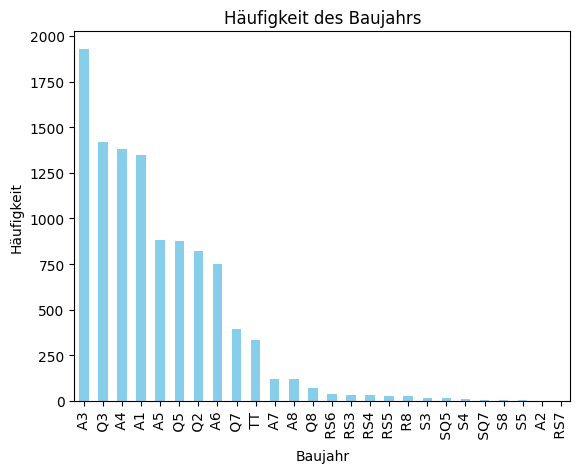

In [57]:
# Häufigkeiten der einzigartigen Werte einer Spalte berechnen
haeufigkeiten = uc_audi['model'].value_counts()

# Balkendiagramm erstellen
haeufigkeiten.plot(kind='bar', color='skyblue')

# Titel und Achsenbezeichner hinzufügen
plt.title('Häufigkeit des Baujahrs')
plt.xlabel('Baujahr')
plt.ylabel('Häufigkeit')

# Diagramm anzeigen
plt.show()

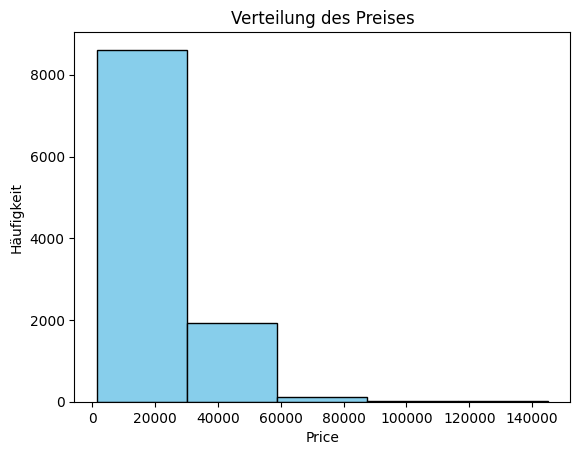

In [58]:
# Histogramm estellen

uc_audi['price'].plot(kind='hist', bins=5, color='skyblue', edgecolor='black')

# Titel und Achsenbezeichner hinzufügen
plt.title('Verteilung des Preises')
plt.xlabel('Price')
plt.ylabel('Häufigkeit')

# Diagramm anzeigen
plt.show()

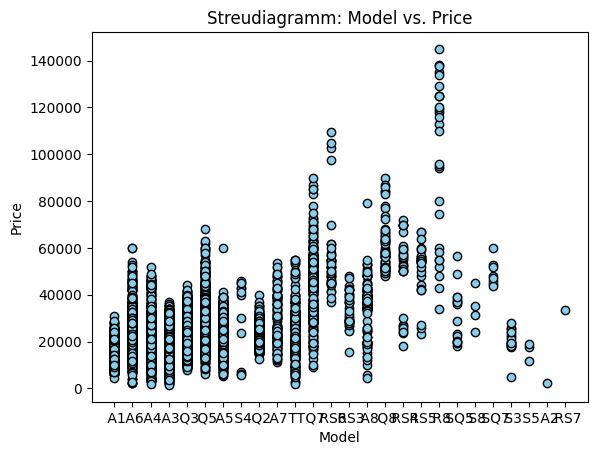

In [59]:
# Streudiagramm erstellen
plt.scatter(uc_audi['model'], uc_audi['price'], color='skyblue', edgecolor='black')

# Titel und Achsenbezeichner hinzufügen
plt.title('Streudiagramm: Model vs. Price')
plt.xlabel('Model')
plt.ylabel('Price')

# Diagramm anzeigen
plt.show()

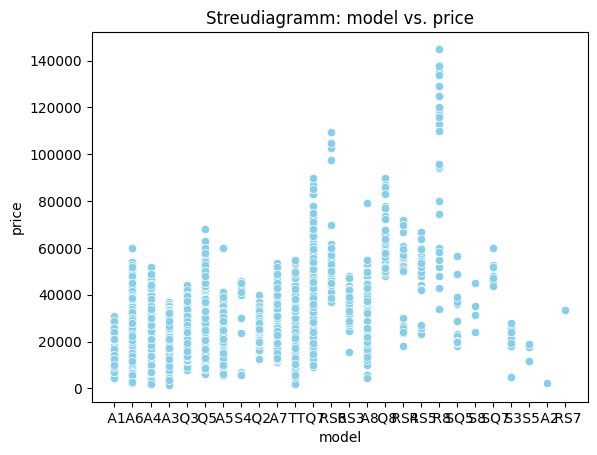

In [60]:
import seaborn as sns

# Streudiagramm mit seaborn erstellen
sns.scatterplot(data=uc_audi, x='model', y='price', color='skyblue')

# Titel hinzufügen
plt.title('Streudiagramm: model vs. price')

# Diagramm anzeigen
plt.show()

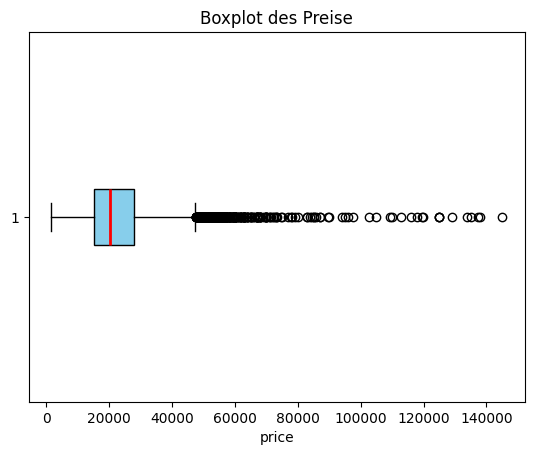

In [61]:
# Boxplot erstellen
plt.boxplot(uc_audi['price'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red', linewidth=2))

# Titel und Achsenbezeichner hinzufügen
plt.title('Boxplot des Preise')
plt.xlabel('price')

# Diagramm anzeigen
plt.show()

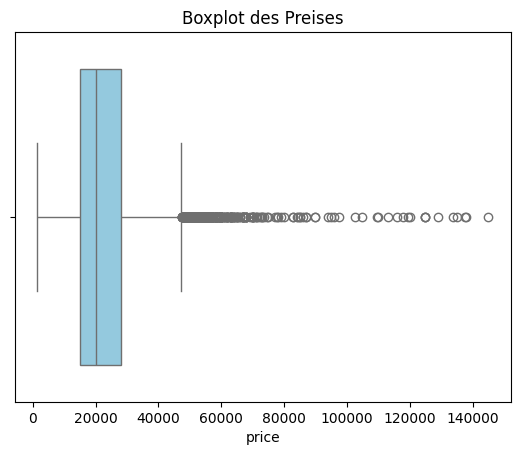

In [63]:
# Boxplot mit seaborn erstellen
sns.boxplot(x=uc_audi['price'], color='skyblue')

# Titel hinzufügen
plt.title('Boxplot des Preises')

# Diagramm anzeigen
plt.show()

C:\Users\charb\AppData\Local\Temp\ipykernel_7972\123658877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='model', y='price', data=uc_audi, palette='Set2')


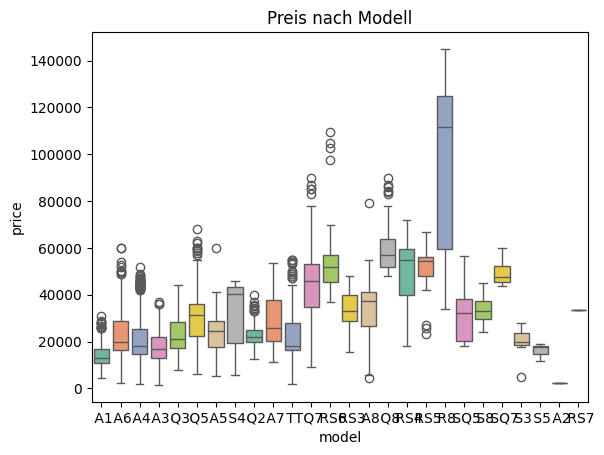

In [65]:
# Boxplot für mehrere Gruppen
sns.boxplot(x='model', y='price', data=uc_audi, palette='Set2')

# Titel hinzufügen
plt.title('Preis nach Modell')

# Diagramm anzeigen
plt.show()

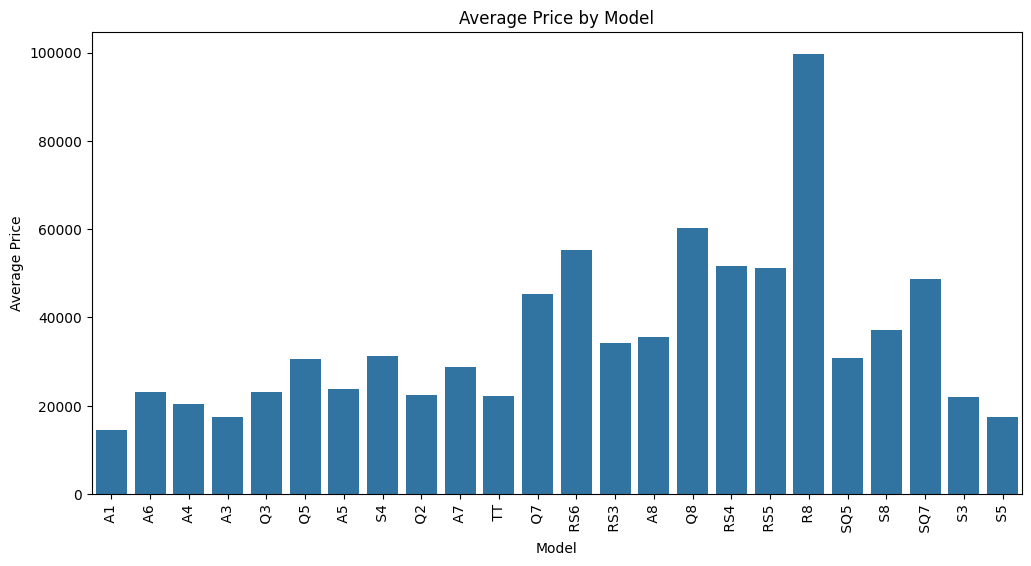

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x='model', y='price', data=uc_audi[:10000], errorbar=None)
plt.title('Average Price by Model')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  
plt.show()